### Analysis for Wristband Project

Aug/14/2023


## Import Dependency

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

Load Data into an Array List

For reference, the csv is a 21 extended object given by
['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'Instruction', 'Signal_Time', 'Batch_time','X','Y']

In [48]:
# subject name to get data path

subject_name = "Hokin"
data_path = "data/" + subject_name
section_numbers = 4

open_data = []
close_data = []
rest_data = []

for i in range (section_numbers):
    section_path = data_path + "/Section_Number_" + str(i)
    open_df = pd.read_csv(section_path + "/open.csv")
    open_data.append(open_df.values)
    close_df = pd.read_csv(section_path + "/close.csv")
    close_data.append(close_df.values)
    rest_df = pd.read_csv(section_path + "/rest.csv")
    rest_data.append(rest_df.values)

Checking if everything makes sense at this point

In [28]:
print(len(rest_data))

4


In [30]:
print(type(open_data))

<class 'list'>


In [31]:
print(np.shape(open_data[2]))

(2000, 21)


In [32]:
print(np.shape(rest_data[1]))

(18024, 21)


Combine all the things together

In [45]:
all_list = [open_data, close_data, rest_data]

Check if things are working:

In [47]:
print(len(all_list))

3


## Visualize Raw Data

Here, we visualize all the data all at once.

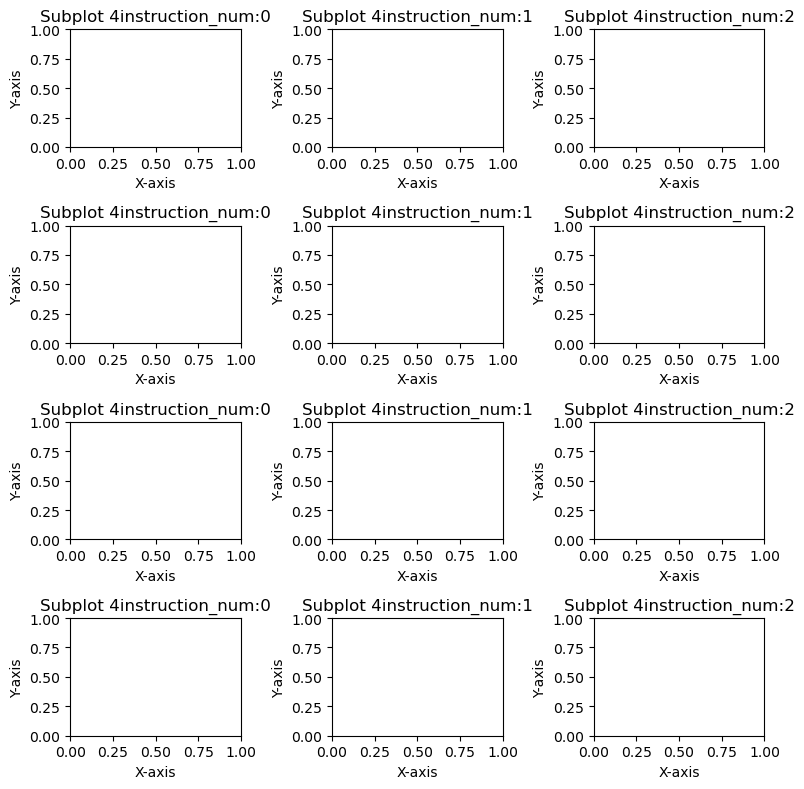

In [53]:
# Create a figure and an array of subplots

fig, axes = plt.subplots(nrows=section_numbers, ncols=3, figsize=(8, 8))

for section_num, row in enumerate(axes):
    for instruction_num, ax in enumerate(row):
        plot_data = all_list[instruction_num][section_num]
        ax.set_title(f'Subplot {i + 1}' + 'instruction_num:' + str(instruction_num))
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with all subplots
plt.show()

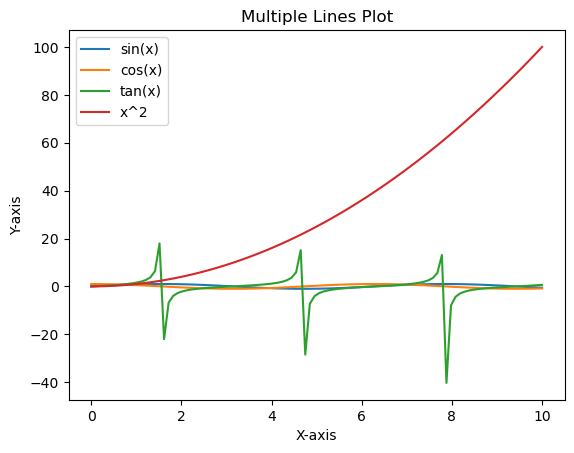

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data
x = np.linspace(0, 10, 100)  # X values for the lines

# Generate different Y values for each line
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = x ** 2

# Plot the lines
plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='cos(x)')
plt.plot(x, y3, label='tan(x)')
plt.plot(x, y4, label='x^2')

# Add labels, title, and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multiple Lines Plot')
plt.legend()

# Show the plot
plt.show()
